# SIMPLE algorithm

(inspired by Versteeg example 6.2)

The 1D u-mom'm equation without diffusion:

$$\frac{d}{dx}\left( \rho u u \right) = -\frac{d p}{dx}$$

The 1D continuity equation:

$$\frac{d}{dx}\left( \rho u \right) = 0$$

In this notebook, we will solve this equation for 2D converging nozzle (quasi-1D, if we assume uni-directional flow) on a staggered grid:

<img src="nozzle.png">

Note, that the scalar cells (cells with pressure, $k$, $\varepsilon$, etc.) automatically have velocity on faces, thus no need for convection scheme for these equations. Velocity cells however still need a convection scheme.

### Mom'm eq

Integrate LHS of the mom'm eq using Gauss' law:

$$   \underbrace{\left( \rho u A \right)_e}_{F_e} u_e - \underbrace{\left( \rho u A \right)_w}_{F_w} u_w  = \underbrace{\frac{\Delta p}{\Delta x} \Delta V}_{S_u}$$

Both $F_e$, $F_w$ and $\Delta p$ will be treated as knowns (calculated from previous iteration, hence the A matrix and b vector changes every iteration) and the upwind scheme (with $u>0$) is used for $u_e$ and $u_w$:


$$   F_e u_P^* = 0 u_E^* + F_w u_W^*  + S_u$$

Asterisks are included, because this solution will not necessarily satisfy the continuity equation.

### Continuity eq

Also, use Gauss's law to integrate continuity:

$$   \left( \rho u A \right)_e - \left( \rho u A \right)_w  = 0$$

Let $i$ denote velocity cells and $I$ pressure cells, hence:

$$   \rho_{i+1} u_{i+1} A_{i+1}  - \rho_i u_i A_i  = 0$$

We can't insert the $u^*$-solution, because this violates continuity. SIMPLE states that the following velocity *does* satisfy continuity:

$$ u_i = u_i^* + d_i \left( p_{I-1}' - p_{I}' \right), $$

The $i$ subscript on $d_i$ means that it is calculated at each velocity cell, more specifically $d_i = \frac{A_i}{a_i}$, where $a_i$ is the $a_P$-coefficient of the mom'm equation. Since this coefficient changes each iteration, also $d_i$ changes on each iteration.

Inserting the SIMPLE $u_i$ into the continuity equation:

$$   \rho_{i+1}  A_{i+1} \left[ u_{i+1}^* + d_{i+1} \left( p_{I}' - p_{I+1}' \right) \right]  - \rho_i A_i \left[ u_i^* + d_i \left( p_{I-1}' - p_{I}' \right) \right]  = 0$$


$$ \Rightarrow   \underbrace{\left( \rho_{i+1}  A_{i+1} d_{i+1}   + \rho_i A_i  d_i  \right)}_{a_I} p_{I}'    = \underbrace{-\rho_{i+1}  A_{i+1} u_{i+1}^* + \rho_i A_i u_i^*}_{b_I'} + \underbrace{\rho_{i+1}  A_{i+1} d_{i+1}}_{a_{I+1}} p_{I+1}' + \underbrace{\rho_i A_i d_i}_{a_{I-1}} p_{I-1}'$$

Solve this tri-diagonal system for $p'$ and update the old pressure field:

$$ p_{I,new} = p_{I,old} + p_I' $$ 

Also, update the velocity field:

$$ u_{i,new} = u_i^* + d_i \left( p_{I-1}' - p_{I}' \right) $$

This new velocity field satisfies continuity! But one problem... it doesn't satisfy the mom'm eq anymore (definitely not with $p_{old}$, because we have changed the $u$-field, but also not with $p_{new}$, because the pressure was *only* corrected to satisfy continuity, *not* to satisfy the mom'm eq). Hence, repeat the above procedure untill convergence.


### Problem details:

- $A_{in} = 0.5~\mathrm{m}^2$
- $A_{out} = 0.1~\mathrm{m}^2$
- $p_{tot} = 10~\mathrm{Pa}$ (total pressure at any point in the flow)
- $p_{out} = 0~\mathrm{Pa}$ (static pressure at outlet)

- $N = 4$ (we have 4 velocity cells)
- $L = 2~\mathrm{m} \Rightarrow \delta x = 0.5~\mathrm{m}$
- $\rho = 1.0~\mathrm{kg/m}^3$


The analytical solution of the problem is (derived from Bernoulli):

$$ u(x) = \frac{A_{out}}{A(x)} u_{out}$$

$$ p(x) = p_{tot} - \frac{1}{2} \rho u(x)^2 ,$$

where $u_{out} = \sqrt{\frac{2 p_{tot}}{\rho}}$.

Analytical results:
x = 0.020 m, A = 0.50 m2, u = 0.9016
x = 0.060 m, A = 0.49 m2, u = 0.9164
x = 0.100 m, A = 0.48 m2, u = 0.9317
x = 0.140 m, A = 0.47 m2, u = 0.9475
x = 0.180 m, A = 0.46 m2, u = 0.9638
x = 0.220 m, A = 0.46 m2, u = 0.9807
x = 0.260 m, A = 0.45 m2, u = 0.9983
x = 0.300 m, A = 0.44 m2, u = 1.0164
x = 0.340 m, A = 0.43 m2, u = 1.0352
x = 0.380 m, A = 0.42 m2, u = 1.0548
x = 0.420 m, A = 0.42 m2, u = 1.0750
x = 0.460 m, A = 0.41 m2, u = 1.0961
x = 0.500 m, A = 0.40 m2, u = 1.1181
x = 0.540 m, A = 0.39 m2, u = 1.1409
x = 0.580 m, A = 0.38 m2, u = 1.1646
x = 0.620 m, A = 0.38 m2, u = 1.1894
x = 0.660 m, A = 0.37 m2, u = 1.2153
x = 0.700 m, A = 0.36 m2, u = 1.2423
x = 0.740 m, A = 0.35 m2, u = 1.2705
x = 0.780 m, A = 0.34 m2, u = 1.3001
x = 0.820 m, A = 0.34 m2, u = 1.3310
x = 0.860 m, A = 0.33 m2, u = 1.3635
x = 0.900 m, A = 0.32 m2, u = 1.3976
x = 0.940 m, A = 0.31 m2, u = 1.4334
x = 0.980 m, A = 0.30 m2, u = 1.4712
x = 1.020 m, A = 0.30 m2, u = 1.5109
x = 1.060 m, A = 0

Text(0, 0.5, 'P [pa]')

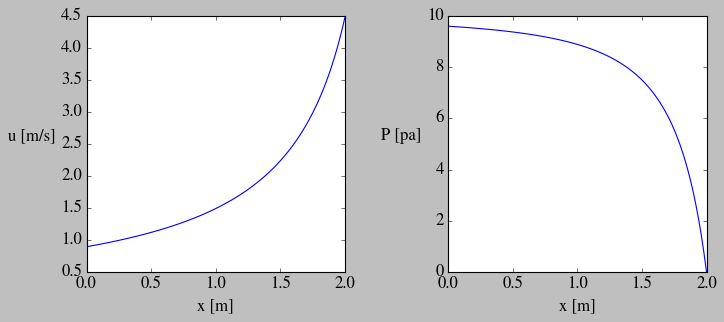

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.optimize import fsolve
import time
mpl.style.use('classic')
# Latex font
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 15
plt.rcParams["legend.scatterpoints"] = 1
plt.rcParams["legend.numpoints"] = 1
yd = dict(rotation=0,ha='right') # I couldn't find a way to customize these, so use a dict everytime..

## Constants
N = 50
L = 2.0; dx = L/N
x = np.linspace(dx/2,L-dx/2,N) # Velocity cell center
x_p = np.linspace(0,L,N+1)     # Pressure cell center
Gamma = 0.1
p_tot = 10.0
p_out = 0.0
rho = 1.0
A_in = 0.5
A_out = 0.1
A = (A_out - A_in)/L * (x-L) + A_out
A_p = (A_out - A_in)/L * (x_p-L) + A_out
al = 0.03  # Under-relaxation (how many percent of updated solution is used)


## Analytical solution
u_out = np.sqrt(2*p_tot/rho)
x_an = np.linspace(0,L,100)
A_an = (A_out - A_in)/L * (x_an-L) + A_out
u_an = A_out/A_an * u_out
p_an = p_tot - 0.5*rho*u_an**2

print('Analytical results:')
for i in range(len(x)):
    print('x = %.3f m, A = %.2f m2, u = %.4f'%(x[i], np.interp(x[i],x_an,A_an), np.interp(x[i],x_an,u_an)))

fig, ax = plt.subplots(1,2,sharex=True,figsize=(10,4))
plt.subplots_adjust(wspace=0.4)
ax[0].plot(x_an, u_an)
ax[1].plot(x_an, p_an)
ax[0].set_xlabel('x [m]')
ax[1].set_xlabel('x [m]')
ax[0].set_ylabel('u [m/s]',yd)
ax[1].set_ylabel('P [pa]',yd)


### Step 1: Solving for $u^*$

In order to calculate $F_e$, $F_w$ and $\Delta p$ at the first iteration, we use these intial fields:

$$ u_{intial}(x) = \frac{1~\mathrm{m}^3/\mathrm{s}}{A(x)} $$

$$ p_{intial}(x) = \frac{-p_{tot}}{L} (x - L) $$

Velocity and static pressure at the inlet:


$$\begin{aligned}
u_{in} &= u_1^* \frac{A_1}{A_{in}}
\end{aligned}
$$

$$\begin{aligned}
p_{in} &= p_{tot} - \frac{1}{2} \rho u_{in}^2 
\end{aligned}
$$

Hence, the mom'm eq at the first velocity cell reads:

$$\begin{aligned}
F_e u_1^* - F_w u_{in}  &= (p_{in}-p_B) A_1 \\
\left(F_e - F_w  \frac{A_1}{A_{in}}\right) u_1^* &= \left(\left[p_{tot} - \frac{1}{2} \rho \left(u_1^* \frac{A_1}{A_{in}}\right)^2\right]-p_B\right) A_1
\end{aligned}
$$

$$ \Rightarrow \left(F_e + \frac{1}{2} \underbrace{\rho A_1 u_1^*}_{F_w} \left( \frac{A_1}{A_{in}}\right)^2 \right) u_1^* = \underbrace{\left(p_{tot} -p_B\right) A_1 + F_w  \frac{A_1}{A_{in}} u_1^*}_{S_u}
$$

Note, that both $F_e$, $F_w$ and $S_u$ are calculated using values from the previous iteration. When calculating $F_e$ from the previous iteration a simple CDS scheme is used to obtain $u_e$, i.e. linear interpolation.


The cell 4 (final velocity cell) is fortunately a little simpler:

$$   F_e u_4^* = 0 + F_w u_3^*  + (p_D - p_{out}) A_4 ,$$

where again $F_e$, $F_w$ and $\Delta p$ are calculated from the previous iteration ($F_e = \rho A_4 u_4*$ is used, i.e. continuity). 



We are now ready to assemble the tri-diagonal matrix (actually, di-diagonal, because $a_E = 0$).

In [2]:
## Initial fields
u_initial = 1/A
p_initial = -p_tot/L * (x_p-L)

#print(u_initial)
#print(p_initial)


## Tri-diagonal matrix shortcut
def tridiag(a1, a2, a3, k1=-1, k2=0, k3=1):
    '''
    Create N x N tri-diagonal matrix
    a1 is the lower-diagonal (size N-1)
    a2 is the diagonal       (size N)
    a3 is the upper-diagonal (size N-1)
    Don't touch the k's!
    '''
    return np.diag(a1, k1) + np.diag(a2, k2) + np.diag(a3, k3)


def create_tridiag_matrix(a1,a2,a3,N,a2_1,a2_N):
    '''
    Create a tridiag type of matrix
    a1 = value at lower diagonal (scalar)
    a2 = value at diagonal (scalar)
    a3 = value at upper diagonal (scalar)
    N = size of matrix (scalar)
    a2_1 = element 1,1 (scalar)
    a2_N = element N,N (scalar)
    '''
    a1vec = np.ones(N-1)*a1   
    a2vec = np.ones(N)*a2
    a2vec[0] = a2_1; a2vec[-1] = a2_N
    a3vec = np.ones(N-1)*a3  
    return tridiag(a1vec, a2vec, a3vec)


def simple_momm(u_initial, p_initial, pinfo=0):
    F_e_initial = np.ones(N)
    F_w_initial = np.ones(N)
    a2_initial = np.ones(N) # Diagonal of A matrix
    b_initial = np.ones(N) # b vector
    d = np.ones(N) # d vector to be used later
    for i in range(N):
        # Obtain F_e
        if(i==N-1):
            F_e_initial[i] = rho*A[i]*u_initial[i]
        else:
            F_e_initial[i] = rho*A_p[i+1]*(u_initial[i]+u_initial[i+1])/2
        # Obtain F_w
        if(i==0):
            F_w_initial[i] = rho*A[i]*u_initial[i]
        else:
            F_w_initial[i] = rho*A_p[i]*(u_initial[i-1]+u_initial[i])/2
        # Obtain a1
        if(i==0):
            a2_initial[i] = (F_e_initial[i] + 0.5*F_w_initial[i]*(A[i]/A_in)**2)
        else:
            a2_initial[i] = F_e_initial[i]
        # Obtain b-vector
        if(i==0):
            b_initial[i] = (p_tot-p_initial[i+1])*A[i] + F_w_initial[0]*A[i]/A_in * u_initial[i]
        elif(i==N-1):
            b_initial[i] = (p_initial[i]-p_out)*A[i]
        else:
            b_initial[i] = (p_initial[i]-p_initial[i+1])*A[i]
        d[i] = A[i]/a2_initial[i]


    # a1 vector
    a1_initial = F_w_initial[1:]

    # a3 vector
    a3_initial = np.zeros(N-1)


    ## Assemble matrix
    a_initial = tridiag(-a1_initial, a2_initial, a3_initial)


    ## Print to screen
    if(pinfo==1):
        print('A matrix:')
        print(a_initial)
        print('\nb vector:')
        print(b_initial)

    ustar = np.matmul(np.linalg.inv(a_initial),b_initial)

    return ustar, d


ustar, d = simple_momm(u_initial, p_initial, pinfo=1)
print('ustar:')
print(ustar)   

A matrix:
[[ 1.4920981   0.          0.         ...  0.          0.
   0.        ]
 [-1.0000661   1.00006831  0.         ...  0.          0.
   0.        ]
 [ 0.         -1.00006831  1.00007062 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.00119048  0.
   0.        ]
 [ 0.          0.          0.         ... -1.00119048  1.00137363
   0.        ]
 [ 0.          0.          0.         ...  0.         -1.00137363
   1.        ]]

b vector:
[2.0992 0.0976 0.096  0.0944 0.0928 0.0912 0.0896 0.088  0.0864 0.0848
 0.0832 0.0816 0.08   0.0784 0.0768 0.0752 0.0736 0.072  0.0704 0.0688
 0.0672 0.0656 0.064  0.0624 0.0608 0.0592 0.0576 0.056  0.0544 0.0528
 0.0512 0.0496 0.048  0.0464 0.0448 0.0432 0.0416 0.04   0.0384 0.0368
 0.0352 0.0336 0.032  0.0304 0.0288 0.0272 0.0256 0.024  0.0224 0.0208]
ustar:
[1.406878   1.50446824 1.60045798 1.69484718 1.78763582 1.87882385
 1.96841123 2.0563979  2.14278383 2.22756894 2.31075317 2.39233646
 2.47231872 2.55069988

### Step 2: Pressure correction

Now we need to solve for $p'$. For the boundary nodes we set $p'=0$, hence we only need to solve the internal pressure cells!


In [3]:


def simple_prescor(ustar,d,pinfo=0):
    # Beware, indices are a little confusing here, because I also include the first and last equation.

    # Diagonal element
    A_I = np.ones(N+1)
    b_I = np.ones(N+1)
    for i in range(len(A_I)):
        if(i==0 or i==(N)):
            A_I[i] = 1
            b_I[i] = 0
        else:
            A_I[i] = (rho*A[i]*d[i] + rho*A[i-1]*d[i-1])
            b_I[i] = -rho*A[i]*ustar[i] + rho*A[i-1]*ustar[i-1]

    # Lower diagonal
    A_Il = np.ones(N)  # "l" = lower
    for i in range(len(A_Il)):
        if(i==0 or i==(N-1)):
            A_Il[i] = 0
        else:
            A_Il[i] = rho*A[i]*d[i] # This enters starting from 3rd eq 

    # Upper diagonal
    A_Iu = np.ones(N)  # "u" = upper
    for i in range(len(A_Iu)):
        if(i==0 or i==(N-1)):
            A_Iu[i] = 0
        else:
            A_Iu[i] = rho*A[i]*d[i] # This enters starting from 2nd eq
            # This is the reason why same index is used for both A_Iu and A_Il (they do not refer to same eq!!)

    ## Assemble matrix
    a_pressure = tridiag(-(A_Il), A_I, -(A_Iu))

    if(pinfo==1):
        print('Matrix:')
        print(a_pressure)
        print('vector:')
        print(b_I)

    p_p = np.matmul(np.linalg.inv(a_pressure), b_I)
    
    return p_p

p_p = simple_prescor(ustar,d,pinfo=1)

print('Pressure correction:')
print(p_p)


Matrix:
[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.40300697 -0.23812773 ...  0.          0.
   0.        ]
 [ 0.         -0.23812773  0.46851146 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.02690967 -0.01252679
   0.        ]
 [ 0.          0.          0.         ... -0.01252679  0.02334279
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]
vector:
[ 0.         -0.03636901 -0.03403933 -0.03174804 -0.02949515 -0.02728066
 -0.02510455 -0.02296685 -0.02086754 -0.01880662 -0.01678409 -0.01479996
 -0.01285421 -0.01094686 -0.0090779  -0.00724733 -0.00545515 -0.00370136
 -0.00198595 -0.00030893  0.00132971  0.00292997  0.00449185  0.00601535
  0.00750047  0.00894722  0.0103556   0.01172561  0.01305726  0.01435056
  0.0156055   0.01682209  0.01800035  0.01914028  0.02024188  0.02130518
  0.02233019  0.02331693  0.02426541  0.02517566  0.02604773  0.02688164
  0.02767746 

### Step 3: Update pressure and velocity



In [4]:

def simple_update(p_initial, u_initial, ustar, p_p, alpha=1.0):
    # Update velocity
    u_updated = ustar + d*np.diff(-p_p)
    u_new = (1-alpha)*u_initial + alpha*u_updated
    
    # Update pressure
    p_updated = p_initial + p_p
    p_updated[0] = p_tot - 0.5*rho*(u_updated[0]*A[0]/A_in)**2 # See bottom of p.207 
    p_new = (1-alpha)*p_initial + alpha*p_updated


    return p_new, u_new

print('### Without relaxation')
p_new, u_new = simple_update(p_initial, u_initial, ustar, p_p)
print(p_new)
print(u_new)


print('### With 0.8 relaxation')
p_newr, u_newr = simple_update(p_initial, u_initial, ustar, p_p, alpha=al)
print(p_newr)
print(u_newr)


### Without relaxation
[ 8.99419968  9.73120391  9.63629861  9.69267648  9.90033577 10.25918303
 10.76902019 11.42952974 12.2402581  13.20059648 14.30975921 15.56675896
 16.9703784  18.51913778 20.21125771 22.04461643 24.01670049 26.12454803
 28.36468293 30.73303868 33.22486975 35.83464834 38.55594378 41.38128105
 44.30197454 47.30793188 50.38742169 53.52679772 56.71016968 59.91900894
 63.13167423 66.32283818 69.46279067 72.51658795 75.44300738 78.19325567
 80.70936187 82.92216418 84.74876873 86.0893156  86.82282677 86.80182397
 85.84527901 83.72927409 80.17447262 74.82907873 67.24530507 56.84632119
 42.87894281 24.34444834  0.        ]
[1.42974705 1.45318553 1.47740529 1.50244605 1.5283503  1.55516346
 1.58293424 1.61171486 1.64156143 1.67253429 1.70469841 1.73812387
 1.77288634 1.8090677  1.84675661 1.8860493  1.92705037 1.96987372
 2.01464357 2.06149575 2.11057898 2.16205652 2.21610793 2.27293121
 2.33274519 2.39579236 2.46234214 2.53269478 2.6071858  2.68619143
 2.77013491 2.859494

This new velocity field satisfies continuity, but not the mom'm eq anymore... repeat!

### Step 4: Repeat step 1-3 untill convergence

It can be an idea to use relaxation:

Static pressure [Pa]:
[9.57777345 9.5708517  9.5565505  9.5415262  9.52572919 9.50910559
 9.49159669 9.47313854 9.45366111 9.43308823 9.41133575 9.38831211
 9.36391621 9.33803658 9.3105506  9.28132263 9.25020212 9.21702201
 9.18159658 9.14371862 9.10315631 9.05964974 9.01290695 8.96259891
 8.90835362 8.84974913 8.78630541 8.71747458 8.64262904 8.56104704
 8.4718951  8.37420668 8.26685591 8.14852508 8.01766397 7.87243869
 7.71066704 7.52973593 7.32649524 7.09711969 6.83692751 6.54013932
 6.19955414 5.8061079  5.34826342 4.81115394 4.17535928 3.41512274
 2.49569626 1.36929008 0.        ]

Velocity [m/s]:
[0.92635211 0.94153821 0.95723052 0.97345476 0.99023847 1.00761107
 1.02560413 1.04425147 1.06358946 1.08365719 1.10449675 1.12615355
 1.14867662 1.172119   1.19653815 1.2219964  1.24856154 1.27630736
 1.30531434 1.33567049 1.36747217 1.40082515 1.43584578 1.47266233
 1.51141661 1.5522657  1.5953842  1.6409666  1.68923032 1.74041912
 1.79480722 1.85270423 1.91446103 1.98047693 2.05120825

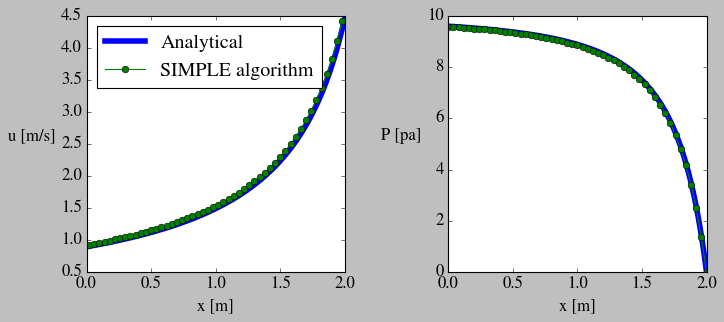

In [14]:
# Run additional iterations
Nit = 100


for i in range(Nit):
    # Step 1:
    ustar, d = simple_momm(u_newr, p_newr)
    # Step 2:
    p_p = simple_prescor(ustar,d)
    # Step 3:
    p_newr, u_newr = simple_update(p_newr, u_newr, ustar, p_p, alpha=al)

# After a total of 19 iterations
print('Static pressure [Pa]:')
print(p_newr)
print('\nVelocity [m/s]:')
print(u_newr)

print('\nMass flow rate, rho*u*A [kg/s]:')
print(rho*u_newr*A)


# Numerical solution vs analytical
fig, ax = plt.subplots(1,2,sharex=True,figsize=(10,4))
plt.subplots_adjust(wspace=0.4)
ax[0].plot(x_an, u_an,linewidth=5,label='Analytical')
ax[0].plot(x, u_newr,'go-',label='SIMPLE algorithm')
ax[1].plot(x_an, p_an,linewidth=5)
ax[1].plot(x_p, p_newr,'go-')
ax[0].set_xlabel('x [m]')
ax[1].set_xlabel('x [m]')
ax[0].set_ylabel('u [m/s]',yd)
ax[1].set_ylabel('P [pa]',yd)
ax[0].legend(loc='upper left')

The reason for this seemingly "bad" numerical solution is the low number of grid points ($N = 4$).

Important, when refining grid:
- Need to use more under-relaxation for stability (e.g. N=10: alpha=0.3, N=20: alpha=0.1, , N=50: alpha=0.03)
- Therefore more iterations are also needed (e.g. Nit=100). This could be automatized by setting a u-mom'm residual criterium.

$$ \vec{r} = \textbf{A}^{(n)} \vec{u}^{(n-1)} - \vec{b}^{(n)}$$

$$ res = \sum_{i=1}^{N} |r_i| $$

Here the A matrix and b vector are from the current iteration, while the velocity is from the previous.


### More complicated algorithms


- SIMPLER
